# Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

### Features

| NAME                              | DESCRIPTION                                                                                                        |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
| Tokenization                      | Segmenting text into words, punctuations marks etc.                                                                |
| Part-of-speech (POS) Tagging      | Assigning word types to tokens, like verb or noun.                                                                 |
| Dependency Parsing                | Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object. |
| Lemmatization                     | Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.      |
| Sentence Boundary Detection (SBD) | Finding and segmenting individual sentences.                                                                       |
| Named Entity Recognition (NER)    | Labelling named “real-world” objects, like persons, companies or locations.                                        |
| Entity Linking (EL)               | Disambiguating textual entities to unique identifiers in a knowledge base.                                         |
| Similarity                        | Comparing words, text spans and documents and how similar they are to each other.                                  |
| Text Classification               | Assigning categories or labels to a whole document, or parts of a document.                                        |
| Rule-based Matching               | Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.       |
| Training                          | Updating and improving a statistical model’s predictions.                                                          |
| Serialization                     | Saving objects to files or byte strings.                                                                           |

In [1]:
import spacy

2021-08-18 17:10:01.932410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-18 17:10:01.932483: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Downloading models

https://spacy.io/usage/models

In [2]:
#!python -m spacy download en_core_web_lg

### Creating nlp pipeline

At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp". You can use the nlp object like a function to analyze text.It contains all the different components in the pipeline.
It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages that are available in spacy.lang

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### The Doc object

When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.
The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [5]:
# Created by processing a string of text with the nlp object
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)
    
print(type(doc))
doc

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion
<class 'spacy.tokens.doc.Doc'>


Apple is looking at buying U.K. startup for $1 billion

### The Token object

Token objects represent the tokens in a document – for example, a word or a punctuation character.
To get a token at a specific position, you can index into the doc.
Token objects also provide various attributes that let you access more information about the tokens. For example, the .text attribute returns the verbatim token text.

<img src="./img/spacy1.png">

In [6]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Index into the Doc to get a single Token
token = doc[2]

# Get the token text via the .text attribute
print(token.text)

looking


### Tokenization
Segment text into words, punctuations marks, etc.


In [8]:
tokens = nlp.tokenizer("""
Tokenization segments text into words, punctuations marks, etc. 
It is smarter than regex. 
It won't split the U.K. for example.
""")
list(tokens)

[,
 Tokenization,
 segments,
 text,
 into,
 words,
 ,,
 punctuations,
 marks,
 ,,
 etc,
 .,
 ,
 It,
 is,
 smarter,
 than,
 regex,
 .,
 ,
 It,
 wo,
 n't,
 split,
 the,
 U.K.,
 for,
 example,
 .,
 ]

### POS tagging


For each token in the doc, we can print the text and the .pos_ attribute, the predicted part-of-speech tag.


In [10]:
doc = nlp("She ate the pizza. Billion is a number")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN
. PUNCT
Billion NUM
is AUX
a DET
number NOUN


### Predicting Syntactic Dependencies
In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The .dep_ attribute returns the predicted dependency label.

The .head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

<img src="img/1.png">

In [11]:
doc = nlp("She ate the pizza")

for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


### Lemmatization

In [12]:
doc = nlp("Apple is looking at buying U.K. startup for 1 billion of dollars")

for token in doc:
    print(token.text, token.lemma_)

Apple Apple
is be
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
1 1
billion billion
of of
dollars dollar


### Named Entity Recognition

In [13]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


#### Hint: Spacy Explain
To get definitions for the most common tags and labels, you can use the spacy.explain helper function.

For example, "GPE" for geopolitical entity isn't exactly intuitive – but spacy.explain can tell you that it refers to countries, cities and states.

The same works for part-of-speech tags and dependency labels.

In [14]:
print(spacy.explain("GPE"))
print(spacy.explain("nsubj"))
print(spacy.explain("DET"))

Countries, cities, states
nominal subject
determiner


# Semantic Similarity

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The Doc, Token and Span objects have a .similarity method that takes another object and returns a floating point number between 0 and 1, indicating how similar they are.

One thing that's very important: In order to use similarity, you need a larger spaCy model that has word vectors included.

By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary.

In [15]:
doc1 = nlp("I like fast food")
doc2 = nlp("I like burgers")
doc3 = nlp("Apple is looking at buying U.K. startup for $1 billion")
print(doc1.similarity(doc2))
print(doc1.similarity(doc3))

0.8469945912019771
0.6275414160796284


https://spacy.io/usage/spacy-101

# Word Embeddings

Similarity is determined using word vectors, multi-dimensional representations of meanings of words.


## Word representation

Recall onehot  representation

$$boy \qquad \qquad \, girl\quad \qquad \quad apple\qquad \quad orange\qquad \qquad king\qquad \qquad queen\qquad \qquad\\ \begin{bmatrix} 0 \\ \vdots  \\ 0 \\ 1 \\ 0 \\ \quad  \\ \vdots  \\ \quad  \\ \quad  \\ \quad  \\ 0 \end{bmatrix}\begin{matrix} \quad  \\ \leftarrow 1458 \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \end{matrix}\begin{bmatrix} 0 \\ \vdots  \\ \quad  \\ 0 \\ 1 \\ 0 \\ \vdots  \\ \quad  \\ \quad  \\ \quad  \\ 0 \end{bmatrix}\begin{matrix} \quad  \\ \quad  \\ \leftarrow 3945 \\ \quad  \\ \quad  \\ \quad  \\ \quad  \end{matrix}\begin{bmatrix} 0 \\ \vdots  \\ 1 \\ 0 \\ 1 \\ 0 \\ \vdots  \\ \quad  \\ \quad  \\ \quad  \\ 0 \end{bmatrix}\begin{matrix} \leftarrow 472 \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \end{matrix}\begin{bmatrix} 0 \\ \quad  \\ \quad  \\ \quad  \\ \vdots  \\ \quad  \\ \quad  \\ 1 \\ 0 \\ \vdots  \\ 0 \end{bmatrix}\begin{matrix} \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \leftarrow 6117 \\ \quad  \end{matrix}\begin{bmatrix} 0 \\ \quad  \\ \vdots  \\ \quad  \\ 0 \\ 1 \\ 0 \\ \quad  \\ \vdots  \\ \quad  \\ 0 \end{bmatrix}\begin{matrix} \quad  \\ \quad  \\ \quad  \\ \leftarrow 4924 \\ \quad  \\ \quad  \\ \quad  \end{matrix}\begin{bmatrix} 0 \\  \\ \quad  \\ \quad  \\ \vdots  \\ \quad  \\ \quad  \\ \quad  \\ 0 \\ 1 \\ 0 \end{bmatrix}\begin{matrix} \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \quad  \\ \leftarrow 9714\quad  \\ \quad  \end{matrix}\\ \quad$$


This representation does not provide any relation for similar words e.g. 
<br>`I like apple juice` and   `I like orange juice` 


The target is to get **vectorized reprezentation** even if vectors are not semantically defined. 

The target vectors are expected to be similar by cosine similairity for semantically similar words. 

<img src="img/2.png" align = 'left' style="width:350;height:250px;"> <br>
<div style="clear:left;"></div>

If model is trained using such vectors then having in traing set $\quad$ `I like apple` <u><b> juice </b></u>,  <br>  would make easier to predict $\quad$ <u><b> juice </b></u> $\quad$ for $\quad$  `I like orange` <u><b> $\text{_____}$ </b></u>




### Spacy

In [102]:
doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(len(doc[3].vector))
print(doc[3].vector)

300
[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-0

### Word2Vec
https://uk.wikipedia.org/wiki/Word2vec

The idea behind Word2Vec is pretty simple. We are making and assumption that you can tell the meaning of a word by the company it keeps. This is analogous to the saying show me your friends, and I'll tell who you are. So if you have two words that have very similar neighbors (i.e. the usage context is about the same), then these words are probably quite similar in meaning or are at least highly related. For example, the words shocked,appalled and astonished are typically used in a similar context.

In this tutorial, you will learn how to use the Gensim implementation of Word2Vec and actually get it to work! I have heard a lot of complaints about poor performance etc, but its really a combination of two things, (1) your input data and (2) your parameter settings. Note that the training algorithms in this package were ported from the original Word2Vec implementation by Google and extended with additional functionality.

#### Training word2vec model using gensim

In [16]:
import gzip
import gensim

#### Loading data


In [17]:
input_file = "./data/reviews_data.txt.gz"

with gzip.open(input_file, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [130]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    print("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open(input_file, 'rb') as f:
        for i, line in enumerate (f): 
            if (i%10000==0):
                print("read {0} reviews".format(i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list(read_input(input_file))
print("Done reading data file")

reading file ./data/reviews_data.txt.gz...this may take a while
read 0 reviews
read 10000 reviews
read 20000 reviews
read 30000 reviews
read 40000 reviews
read 50000 reviews
read 60000 reviews
read 70000 reviews
read 80000 reviews
read 90000 reviews
read 100000 reviews
read 110000 reviews
read 120000 reviews
read 130000 reviews
read 140000 reviews
read 150000 reviews
read 160000 reviews
read 170000 reviews
read 180000 reviews
read 190000 reviews
read 200000 reviews
read 210000 reviews
read 220000 reviews
read 230000 reviews
read 240000 reviews
read 250000 reviews
Done reading data file


Training the model is fairly straightforward. You just instantiate Word2Vec and pass the reviews that we read in the previous step (the documents). So, we are essentially passing on a list of lists. Where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary.

After building the vocabulary, we just need to call train(...) to start training the Word2Vec model. Training on the OpinRank dataset takes about 10 minutes so please be patient while running your code on this dataset.

<img src="img/7.png">

In [133]:
model = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=24)
model.train(documents,total_examples=len(documents),epochs=10)

(303494579, 415193580)

In [19]:
import pickle

# with open("./w2v.model", "wb") as f:
#     pickle.dump(model, f)
    
with open("./w2v.model", "rb") as f:
    model = pickle.load(f)

In [20]:
word_v= model.wv.get_vector('hello')
print(len(word_v))
print(word_v)

150
[-1.3899217  -0.3737228  -2.666311    3.54252     3.2357097   0.20491503
 -2.1295466   0.54146177 -0.6249488   2.6508749   1.5873171  -5.1272163
 -3.084422    3.939809   -2.0652852   0.2448739  -0.43315598  0.3170544
 -2.1743352  -0.57942677 -3.5716836   0.786738   -0.0889107  -3.9856489
  2.4038577   6.2939167  -1.6515285  -1.6507418  -0.8590235   4.383898
  2.71958    -6.02498    -2.510434    0.84199876 -0.8735189  -2.5513418
  2.097896    0.15211919  0.65232474 -2.0750084  -0.25561252  0.5879701
  4.7977505  -0.40362814 -1.4729497   4.4881735   3.239752    1.4243891
 -4.498614    5.750339   -1.8617357  -0.34265506 -2.1606433   5.9471455
  1.7514248  -0.6553776  -4.166816   -1.3523401   2.388277    1.7823781
 -4.9179635  -1.002605    1.7314526   0.05238996 -1.3864789  -4.0298486
 -2.1944242  -2.126804    1.9887234   0.33664438 -3.884635    0.5266325
  1.7292053  -0.43828267 -4.6069155   1.3125004  -1.2170959  -3.6522167
 -0.3835142  -4.174236    1.0721489   0.41395473 -1.2947817 

#### Now, let's look at some output
This first example shows a simple case of looking up words similar to the word dirty. All we need to do here is to call the most_similar function and provide the word dirty as the positive example. This returns the top 10 similar words.

In [21]:
w1 = "dirty"
model.wv.most_similar(positive=w1)

[('filthy', 0.8643262386322021),
 ('stained', 0.783256471157074),
 ('unclean', 0.7817822098731995),
 ('smelly', 0.7720529437065125),
 ('dusty', 0.7595260143280029),
 ('grubby', 0.7468538880348206),
 ('mouldy', 0.7240976095199585),
 ('soiled', 0.723734974861145),
 ('gross', 0.7211849689483643),
 ('dingy', 0.7200460433959961)]

In [23]:
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9287809729576111),
 ('friendly', 0.8312320709228516),
 ('professional', 0.7926158308982849),
 ('cordial', 0.790034294128418),
 ('attentive', 0.7775870561599731),
 ('curteous', 0.7551116347312927)]

In [24]:
w1 = ["vehicle"]
model.wv.most_similar (positive=w1,topn=6)

[('car', 0.7947025895118713),
 ('vehicles', 0.6487293243408203),
 ('minivan', 0.6484553217887878),
 ('suv', 0.6222910284996033),
 ('cars', 0.5939807295799255),
 ('baggages', 0.5902112126350403)]

That's, nice. You can even specify several positive examples to get things that are related in the provided context and provide negative examples to say what should not be considered as related. In the example below we are asking for all items that relate to bed only:


### Analogy reasoning

$boy - girl =  \begin{bmatrix} \text{~ 0} \\ \text{~ 2} \\ \text{~ 0} \\ \text{~ 0} \\  \text{~ 0} \\ \vdots \\ \text{~ 0}  \\ \end{bmatrix} \qquad king - queen =  \begin{bmatrix} \text{~ 0} \\ \text{~ 2} \\ \text{~ 0} \\ \text{~ 0} \\  \text{~ 0} \\ \vdots \\ \text{~ 0}  \\ \end{bmatrix}$

We may say:  `boy` - `girl` = `king` - `queen`

Furher, answer the questions like `boy` is to `girl` as `king` is to `WHO?`




In [25]:
result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

# king - man + woman = ?

print(result)

[('queen', 0.7679240703582764)]


In [26]:
result = model.wv.most_similar(positive=["doctor", "woman"], negative=['man'], topn=1)

# doctor - man + woman = ?

print(result)

[('nurse', 0.5307596325874329)]


In [27]:
result = model.wv.most_similar(positive=["huge", "small"], negative=['big'], topn=1)

# huge - big + small = ?

print(result)

[('tiny', 0.7188771367073059)]


#### Similarity between two words in the vocabulary

In [28]:
print('similarity between two identical words')
print(model.wv.similarity(w1="dirty",w2="dirty"))

print('\nsimilarity between two different words')
print(model.wv.similarity(w1="dirty",w2="smelly"))
print(model.wv.similarity(w1="bye",w2="goodbye"))
print(model.wv.similarity(w1="car",w2="vehicle"))

print('\nsimilarity between two opposit words')
print(model.wv.similarity(w1="dirty",w2="clean"))
print(model.wv.similarity(w1="wet",w2="dry"))

print('\nsimilarity between two unrelated words')
print(model.wv.similarity(w1="green",w2="hotel"))
print(model.wv.similarity(w1="hello",w2="the"))


similarity between two identical words
1.0

similarity between two different words
0.77205294
0.54594237
0.79470253

similarity between two opposit words
0.27225775
0.4558458

similarity between two unrelated words
0.0042668898
-0.023576831


Under the hood, it computes the cosine similarity between the two specified words using word vectors of each. From the scores, it makes sense that dirty is highly similar to smelly but dirty is dissimilar to clean. If you do a similarity between two identical words, the score will be 1.0 as the range of the cosine similarity score will always be between [0.0-1.0]. You can read more about cosine similarity scoring here.

#### Find the odd one out
You can even use Word2Vec to find odd items given a list of items.

In [29]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [30]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","sheet","shower"])

'shower'

### USE - Universal Sentence Encoder

The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.

The model is trained and optimized for greater-than-word length text, such as sentences, phrases or short paragraphs. It is trained on a variety of data sources and a variety of tasks with the aim of dynamically accommodating a wide variety of natural language understanding tasks. The input is variable length English text and the output is a 512 dimensional vector. 



In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [33]:
# Import the Universal Sentence Encoder's TF Hub module
# It may take a while

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/3" 
# embed = hub.Module(module_url)

# or download the model and use it locally

embed = tf.saved_model.load("./USE/")

2021-08-18 17:30:40.329336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-18 17:30:40.330294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-18 17:30:40.330443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-08-18 17:30:40.330571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-08-18 17:30:40.637184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [34]:
# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]


message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344483561813831, 0.00048085584421642125, 0.06595248728990555, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.0165242962539196, 0.01573782227933407, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833269163966179, -0.0558621808886528, -0.012941432185471058, ...]



In [35]:
str1 = "I like my bike"
str2 = "My motorcycle looks good"
str3 = "Two more cells and we are done"

messages = [str1, str2, str3]
emb1, emb2, emb3 = embed(messages)

print(f"The similarity between '{str1}' and '{str2}' = {np.inner(emb1, emb2)}")
print(f"The similarity between '{str1}' and '{str3}' = {np.inner(emb1, emb3)}")

The similarity between 'I like my bike' and 'My motorcycle looks good' = 0.7165157198905945
The similarity between 'I like my bike' and 'Two more cells and we are done' = 0.0004695691168308258


In [36]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")


def run_and_plot(messages, encoding_tensor):
    message_embeddings = encoding_tensor(messages)
    plot_similarity(messages, message_embeddings, 90)

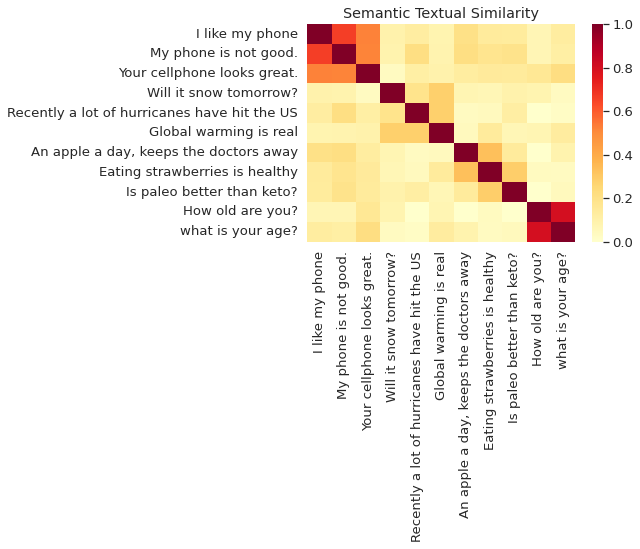

In [37]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages, embed)

# Home task

1. Using a Spacy, create a keywords extractor that should do the following things:
 - Take some text (article like) as an input.
 - Remove all stop words from the text.
 - Extract all the Nouns from text and sort them by count and return in descending order with amount of occurrences. 
 - Extract all the Verbs from text and sort them by count and return in descending order with amount of occurrences.  
 - Extract all the Numbers from text and sort them by count and return in descending order with amount of occurrences. 
 - Extract all the Named Entities from the text, group them into 4 groups (Location, Person, Organization, Misc.) and return groups in descending order with amount of occurrences. 


2. Using multilingual USE, align strings in English and Russian texts:
 - Download multilingual USE model - https://tfhub.dev/google/universal-sentence-encoder-multilingual/3
 - Read "./data/corpora/en.txt" and "./data/corpora/ru.txt" files
 - Align English strings with their Russian analogues using mUSE
 
 
3. Using the USE, create a Duplicate Phrase Finder that will do the following:
 - Take some large text as an input.
 - Separates text to SENTENCES (phrases). 
 - Finds semantically similar strings (cosine similarity >=0.80)

In [38]:
# Read "./data/corpora/en.txt" and "./data/corpora/ru.txt" files

en = []
ru = []
with open("./data/corpora/en.txt") as f:
    for line in f.readlines()[:50]:
        en.append(line.strip())
        
with open("./data/corpora/ru.txt") as f:
    for line in f.readlines()[:50]:
        ru.append(line.strip()) 

In [39]:
en

['How do you explain this progression?',
 "Cigarettes are linked to 85% of lung cancer cases, this massively damages people's health.",
 'Everything moves very fast in football',
 "You're never going to win 4-0 every weekend - we're not FC Barcelona!",
 'We got out of Afghanistan.',
 'French troops have left their area of responsibility in Afghanistan']

In [40]:
ru

['Курение связано с 85% случаев рака легких. Оно наносит колоссальный вред здоровью людей.',
 'В футболе все происходит очень быстро.',
 'Французские войска покинули свою зону ответственности в Афганистане',
 'Мы никогда не сможем выигрывать каждые выходные со счетом 4-0.',
 'Мы ушли из Афганистана.',
 'Как вы объясните этот рост?']